## Nama : Hafidz Shidqi
## NIM : 18221074
## Kelas : K02

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

df = pd.read_excel("18221074.xlsx")

#link ipynb :


## 1. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden.

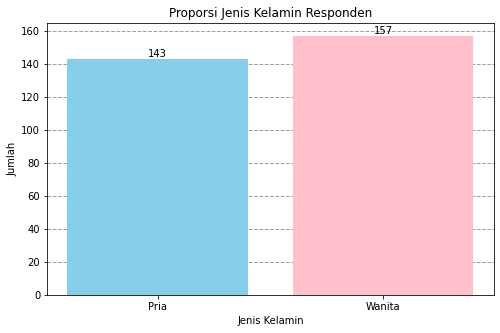

In [14]:
# Menghitung banyaknya responden pria dan wanita
jumlahPria = df["Jenis Kelamin"].value_counts()["Pria"]
jumlahWanita = df["Jenis Kelamin"].value_counts()["Wanita"]

# Membuat fig sebagai figure, ax sebagai axes
fig, ax = plt.subplots()   
fig.set_figwidth(8)
fig.set_figheight(5)

# Visualisasi dengan bar chart
bars = plt.bar(
    ['Pria', 'Wanita'],
    [jumlahPria, jumlahWanita],
    color = ['skyblue', 'pink'],
)

# Mengatur grid agar lebih visualisasi tampak bagus
plt.grid(
    linestyle = '--',
    linewidth = 1,
    axis = 'y',
    alpha = 0.75,
)

# Mengatur axes agar lebih visualisasi tampak bagus
ax.bar_label(bars)
ax.set(
    xlabel = 'Jenis Kelamin',
    ylabel = 'Jumlah',
    title = 'Proporsi Jenis Kelamin Responden'
)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

plt.show()

## 2. Buat tabel frekuensi dan proporsi untuk jenis kelamin responden

In [15]:
#jumlahTotal responden
jumlahTotal = jumlahWanita + jumlahPria

# Membuat tabel frekuensi dan proporsi dari kategoris jenis kelamin
dataFrek = {
    'Jenis Kelamin' : ['Wanita', 'Pria'],
    'Frekuensi' : [jumlahWanita, jumlahPria],
    'Proporsi' : [jumlahWanita/jumlahTotal, jumlahPria/jumlahTotal]
} 
tabelFrek = pd.DataFrame(dataFrek)
tabelFrek.set_index("Jenis Kelamin")

,Frekuensi,Proporsi
Jenis Kelamin,,
Wanita,157,0.523333
Pria,143,0.476667


## 3. Buat histogram untuk data umur responden

In [16]:
#Terdapat data yang kosong (NaN) dan usia yang tidak masuk akal (usia > 200)
ageNan = df[pd.isnull(df['Usia'])]
ageNotValid = df[df['Usia'] > 200]
data = pd.concat([ageNan, ageNotValid])
data

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
77,Wanita,NaN,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,1000%,Tidak,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
124,Wanita,NaN,D3,Karyawan Swasta,Rp 2 juta – Rp 5 juta,Denpasar,900%,Tidak,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
128,Wanita,1969.0,S1,Ibu Rumah Tangga,> Rp 10 juta,Bekasi,NaN,Tidak,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN


In [17]:
#Harus melakukan cleaning data sehingga visualisasi bersifat insightful

# Langkah Pertama : Mengubah Usia yang bernilai 1969 menjadi 2022-1969, mengingat 1969 merupakan tahun kelahiran
ageTemp = df['Usia']
ageTemp = ageTemp.replace(to_replace=1969, value = 53)

# Langkah Kedua   : Mengubah Usia NaN menjadi rata-rata umur berdasarkan pekerjaannya
#                   Asumsi rata-rata usia Mahasiswa = 20 dan Karyawan Swasta = 25 sehingga diubah menjadi 23
ageTemp = ageTemp.replace(to_replace=np.nan, value = 23)
beforeCleansing = df.copy()

#Update df setelah di cleansing agar umur pengguna tidak ada NaN dan tidak ada umur yang tidak valid
df.loc[:, ['Usia']] = ageTemp

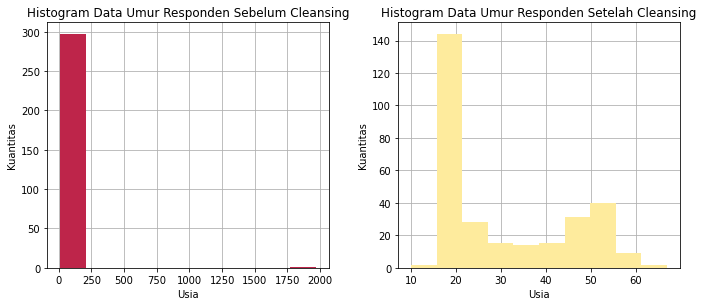

In [18]:
#Plotting Histogram
fig, [ax1, ax2] = plt.subplots(1,2)   #Membuat figure dan axes
fig.tight_layout()
fig.set_figwidth(10)
fig.set_figheight(4)

ax1.hist(beforeCleansing['Usia'], color = '#be254a') #Histogram sebelum cleansing
ax1.set(
    xlabel = "Usia",
    ylabel = "Kuantitas",
    title = "Histogram Data Umur Responden Sebelum Cleansing",
    axisbelow = True
    )
ax1.grid()


ax2.hist(ageTemp, color = '#feeb9d') #Histogram setelah cleansing
ax2.set(
    xlabel = "Usia",
    ylabel = "Kuantitas",
    title = "Histogram Data Umur Responden Setelah Cleansing",
    axisbelow = True
    )
ax2.grid()
plt.show()

## 4. Buat boxplot untuk data umur responden

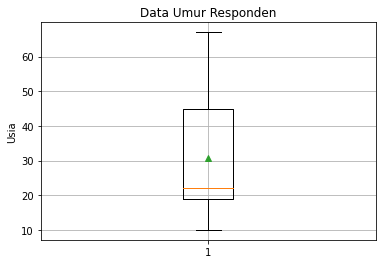

In [19]:
#Plotting boxplot
fig, ax = plt.subplots()
plt.boxplot(ageTemp, showmeans = True)
plt.grid()
ax.set(
    ylabel = 'Usia',
    title = 'Data Umur Responden'
)
plt.show()

## 5. Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden

In [20]:
#Membuat dictionary agar lebih mudah dijadikan tabel
data5 = {
    'No' : [1],
    'Mean' : ageTemp.mean(),
    'Q1' : ageTemp.quantile(0.25),
    'Q2' : ageTemp.quantile(0.5),
    'Q3' : ageTemp.quantile(0.75),
    'Min' : ageTemp.min(),
    'Max' : ageTemp.max()
}
# Membuat tabel
tabel5 = pd.DataFrame(data5)
tabel5.set_index('No')

,Mean,Q1,Q2,Q3,Min,Max
No,,,,,,
1,30.666667,19.0,22.0,45.0,10.0,67.0


## 6. Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)

In [21]:
#Inisialisasi IQR, outlier 1 dan 2
IQR = ageTemp.quantile(0.75) - ageTemp.quantile(0.25)
outlier1 = ageTemp.quantile(0.25) - 1.5 * IQR
outlier2 = ageTemp.quantile(0.75) + 1.5 * IQR

#Mencari outlier 1 dan 2
tableOutlier1 = ageTemp[ageTemp < outlier1]
tableOutlier2 = ageTemp[ageTemp > outlier2]
dataOutlier = pd.concat([tableOutlier1, tableOutlier2])
dataOutlier    # Jawabannya tidak ada

Series([], Name: Usia, dtype: float64)

## 7. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi profesi responden

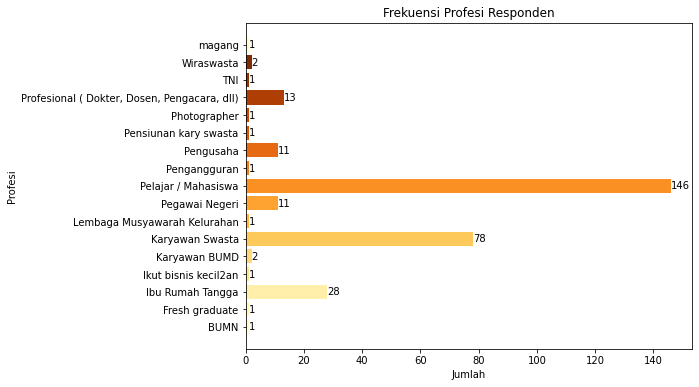

In [22]:
#Mengelompokkan data berdasarkan pekerjaan
jobs = df.groupby(['Pekerjaan']).count()

#Plotting bar chart
palette7 = sns.color_palette("YlOrBr", 16).as_hex()   #Mengembalikan code warna agar visualisasi bar tampak bagus
fig, ax = plt.subplots()
bars = plt.barh(jobs.index, jobs['Jenis Kelamin'], color = palette7)
fig.set(
    figwidth = 8,
    figheight = 6
)
plt.bar_label(bars)
ax.set(
    xlabel = 'Jumlah',
    ylabel = 'Profesi',
    title = 'Frekuensi Profesi Responden'
)
plt.show()

## 8. Buat tabel frekuensi dan proporsi untuk profesi responden

In [23]:
#Inisialisasi jobs sebagai tabel yang dikelompokkan berdasarkan profesi
jobs = df.groupby(['Pekerjaan']).count()
jobs.rename(columns = {'Jenis Kelamin':'Frekuensi'}, inplace = True)

#Membuat column proporsi yaitu frekuensi/jumlah sampel, dengan jumlah sampel valid = 300
copyFrek = pd.DataFrame(jobs.Frekuensi)
copyFrek.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
jobs = pd.concat((jobs, copyFrek), axis = 1)
jobs['Proporsi'] = jobs['Proporsi'].apply(lambda x: x/300)
jobs[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
Pekerjaan,,
BUMN,1,0.003333
Fresh graduate,1,0.003333
Ibu Rumah Tangga,28,0.093333
Ikut bisnis kecil2an,1,0.003333
Karyawan BUMD,2,0.006667
Karyawan Swasta,78,0.260000
Lembaga Musyawarah Kelurahan,1,0.003333
Pegawai Negeri,11,0.036667
Pelajar / Mahasiswa,146,0.486667


## 9. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.

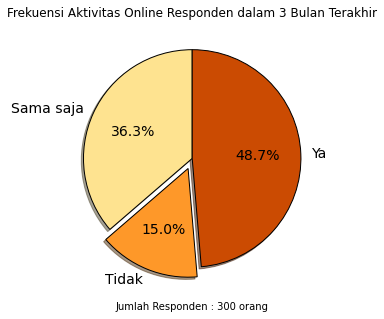

In [24]:
#Membuat tabel yang dikelompokkan berdasarkan aktivitas online meningkat
onlineAct = df.groupby("Aktivitas Online Meningkat").count()

#Plotting pie chart
fig, ax = plt.subplots()
palette9 = sns.color_palette("YlOrBr", 3).as_hex()
pies = plt.pie(onlineAct['Jenis Kelamin'],
        explode = [0, 0.1, 0], 
        autopct='%1.1f%%', 
        shadow= True, 
        startangle=90, 
        textprops={'fontsize': 14, 'weight' : 'light', 'family' : 'sans-serif'},
        labels = onlineAct.index,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
        colors = palette9)

fig.set(
    figwidth = 5,
    figheight = 5
)

ax.set(
    xlabel = 'Jumlah Responden : 300 orang',
    title = 'Frekuensi Aktivitas Online Responden dalam 3 Bulan Terakhir'
)
 
plt.show()

## 10. Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.

In [25]:
#Mengubah nama kolom jenis kelamin menjadi frekuensi karena kolom jenis kelamin dapat merepresentasikan total responden
onlineAct.rename(columns = {'Jenis Kelamin':'Frekuensi'}, inplace = True)

#Membuat column proporsi yaitu frekuensi/jumlah sampel, dengan jumlah sampel valid = 300
copyFrekOA = pd.DataFrame(onlineAct.Frekuensi)
copyFrekOA.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
onlineAct = pd.concat((onlineAct, copyFrekOA), axis = 1)
onlineAct['Proporsi'] = onlineAct['Proporsi'].apply(lambda x: x/300)
onlineAct[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
Aktivitas Online Meningkat,,
Sama saja,109,0.363333
Tidak,45,0.150000
Ya,146,0.486667


## 11. Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7

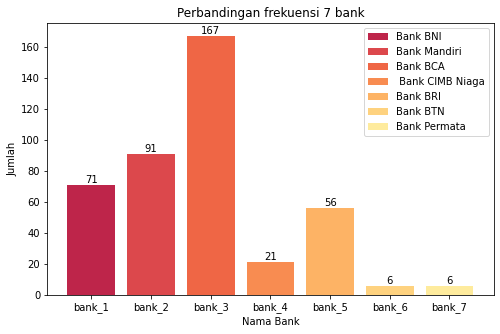

In [26]:
#Membuat dataframe yang berisikan kolom pengguna 7 bank
df11 = df.groupby('Jenis Kelamin').count()
data11 = df11.iloc[:, 14:21].sum()

#Plotting bar chart
fig,ax = plt.subplots()
bars = plt.bar(data11.index, data11, color = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d'])
plt.bar_label(bars)
plt.legend(bars[:], ["Bank BNI", "Bank Mandiri", "Bank BCA", " Bank CIMB Niaga", "Bank BRI", "Bank BTN", "Bank Permata"])
ax.set(
    xlabel = 'Nama Bank',
    ylabel = 'Jumlah',
    title ='Perbandingan frekuensi 7 bank'
)
fig.set(
    figwidth = 8,
    figheight = 5
)
plt.show()

## 12. Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7.

In [27]:
#Membuat kolom frekuensi berdasarkan jenis kelamin karena data jenis kelamin dapat memrepresentasikan frekuensi 
df12 = pd.DataFrame(data11)
df12.columns = ['Frekuensi']
copyFrek12 = pd.DataFrame(df12.Frekuensi)

#Membuat kolom proporsi yaitu frekuensi/jumlah sampel, dengan jumlah sampel valid = 300
copyFrek12.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
df12 = pd.concat((df12, copyFrek12), axis = 1)
df12['Proporsi'] = df12['Proporsi'].apply(lambda x: x/300)
df12[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
bank_1,71,0.236667
bank_2,91,0.303333
bank_3,167,0.556667
bank_4,21,0.070000
bank_5,56,0.186667
bank_6,6,0.020000
bank_7,6,0.020000


## 13. Hitung confidence interval 95% untuk proporsi pengguna Bank BCA:
## ... < $P_{BCA}$ < ...

In [28]:
#Menentukan proporsi BCA dengan jumlah sampel = 300
n = 300
pBCA = 167/n

# Confidence Interval for Proportion :
   #confidence interval 95% = pBCA +- Z(a/2)*sqrt((pBCA*(1-pBCA)/n)
   #Z(a/2) = Z(0.05/2) = 1.95996
ci1 = pBCA - 1.95996*((pBCA*(1-pBCA)/n)**(0.5))
ci2 = pBCA + 1.95996*((pBCA*(1-pBCA)/n)**(0.5))
print(ci1, " < pBCA < ", ci2)

0.5004520333566871  < pBCA <  0.6128812999766462


## 14. Lakukan Uji Hipotesis 
## $H_0 : P_{BCA} = 0.5$ 
## $H_1 : P_{BCA} ≠ 0.5$
## $\alpha = 5\%$

In [47]:
# Menentukan Daerah Kritis
    # Untuk uji dua sisi, maka
    # Z > Z(a/2) atau Z < Z(a/2)
    # Z > z(0.025) atau Z < - z(0.025)
    # Sehingga Zkritis > 1.95996 atau Zkritis < -1.95996

#Tentukan statistik uji
    # Zuji = n * (Psampel - Ppopulasi)/sqrt(Ppopulasi(1-Ppopulasi))
Zuji = (pBCA * n - 0.5 * n) / ( (0.5*n*0.5 )**(0.5))
    # Zuji = 1.9629909152447274
    
print("Karena Zuji (=", Zuji, ") berada di daerah Zkritis (= 1.95996). Maka tolak H0 dengan signifikasi 5%")

Karena Zuji (= 1.9629909152447274 ) berada di daerah Zkritis (= 1.95996). Maka tolak H0 dengan signifikasi 5%


## 15. Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”

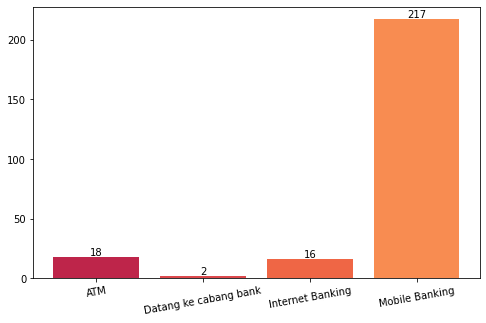

In [30]:
#Mengelompokkan data berdasarkan "Transfer antar bank"
bankTransfer = df.groupby("19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]").count()

#Plotting barchart
fig,ax = plt.subplots()
palette9 = sns.color_palette("YlOrBr", 3).as_hex()
bars = plt.bar(bankTransfer.index, bankTransfer['Jenis Kelamin'], color = ['#be254a', '#dc484c', '#ef6645', '#f88c51'])
plt.bar_label(bars)
plt.xticks(rotation = 10) 
fig.set_figwidth(8)
fig.set_figheight(5)
plt.show()

## 16. Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”

In [31]:
#Membuat kolom frekuensi berdasarkan jenis kelamin karena data jenis kelamin dapat memrepresentasikan frekuensi 
bankTransfer.rename(columns = {'Jenis Kelamin':'Frekuensi', 'Usia' : 'Proporsi'}, inplace = True)
bankTransfer.index.rename("Channel untuk transfer antar bank", inplace = True)

#Membuat kolom proporsi yaitu frekuensi/jumlah responden
bankTransfer.Proporsi = bankTransfer.Proporsi.apply(lambda x: x/bankTransfer.Frekuensi.sum())
bankTransfer[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
Channel untuk transfer antar bank,,
ATM,18,0.071146
Datang ke cabang bank,2,0.007905
Internet Banking,16,0.063241
Mobile Banking,217,0.857708


## 17. Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)

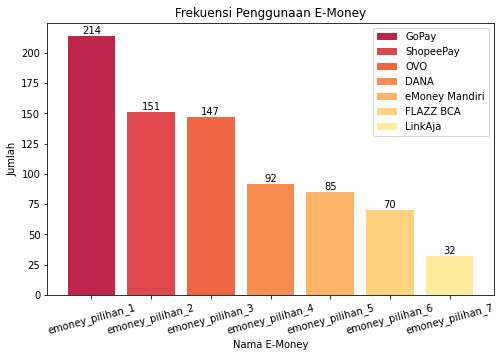

In [32]:
#Membuat dataframe yang berisikan kolom pengguna 7 emoney
df17 = df.groupby('Jenis Kelamin').count()
data17 = df17.iloc[:, 36:43].sum()

#Plotting barchart
fig,ax = plt.subplots()
bars = plt.bar(data17.index, data17, color = ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d'])
plt.bar_label(bars)
plt.legend(bars[:], ["GoPay", "ShopeePay", "OVO", "DANA", "eMoney Mandiri", "FLAZZ BCA", "LinkAja"])
ax.set(
    xlabel = 'Nama E-Money',
    ylabel = 'Jumlah',
    title ='Frekuensi Penggunaan E-Money'
)
plt.xticks(rotation = 15) 
fig.set(
    figwidth = 8,
    figheight = 5
)
plt.show()

## 18. Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)

In [33]:
#Membuat kolom frekuensi
df18 = pd.DataFrame(data17)
df18.columns = ['Frekuensi']

#Membuat kolom proporsi yaitu frekuensi/jumlah sampel, dengan jumlah sampel valid = 300
copyFrek18 = pd.DataFrame(df18.Frekuensi)
copyFrek18.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
df18 = pd.concat((df18, copyFrek18), axis = 1)
df18['Proporsi'] = df18['Proporsi'].apply(lambda x: x/300)
df18[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
emoney_pilihan_1,214,0.713333
emoney_pilihan_2,151,0.503333
emoney_pilihan_3,147,0.490000
emoney_pilihan_4,92,0.306667
emoney_pilihan_5,85,0.283333
emoney_pilihan_6,70,0.233333
emoney_pilihan_7,32,0.106667


## 19. Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO
## ... < $P_{GoPay} − P_{OVO}$ < ...

In [34]:
#Rumus proporsi ganda : 
#(p1 - p2) - Z(a/2)*sqrt( (p1*q1)/n1 + (p2*q2)/n2 ) < P1 - P2 < (p1 - p2) + Z(a/2)*sqrt( (p1*q1)/n1 + (p2*q2)/n2 )
# dengan a = 0.05 dan Z(a/2) = 1.95996

#Menentukan jumlah responden dan proporsi gopay, ovo
n = 300
pGopay = 214/n
pOvo = 147/n

#Menghitung confidence interval
ci1 = (pGopay - pOvo) - 1.95996*( (pGopay*(1-pGopay))/n + (pOvo*(1-pOvo))/n)**(0.5)
ci2 = (pGopay - pOvo) + 1.95996*( (pGopay*(1-pGopay))/n + (pOvo*(1-pOvo))/n)**(0.5)
print(ci1, "< 𝑃𝐺𝑜𝑃𝑎𝑦−𝑃ovo <", ci2)

0.1470551339990369 < 𝑃𝐺𝑜𝑃𝑎𝑦−𝑃ovo < 0.29961153266762985


## 20. Lakukan uji hipotesis berikut:
## $H_0 : P_{GoPay} = P_{OVO}$ 
## $H_1 : P_{GoPay} > P_{OVO}$
## $\alpha = 5\%$

In [46]:
# Menentukan H0 : Pgopay - Povo = 0
# Menentukan H1 : Pgopay - Povo > 0

# Menentukan Daerah Kritis
    # Untuk uji satu sisi, maka
    # Z > Z(a/2) 
    # Z > z(0.025) 
    # Sehingga Zkritis > 1.95996
    
#Tentukan statistik uji
    #Pgabungan = (x1 + x2)/(n1+n2)
pGabungan = (214 + 147)/(2*300)
    # Zuji = (p1 - p2)/sqrt(pGabungan*(1-pGabungan)*(1/n1 + 1/n2))
Zuji = (pGopay - pOvo)/(pGabungan*(1-pGabungan)*(1/300 + 1/300))**(0.5)
    # Zuji = 5.587247070367848
    
print("Karena Zuji (=", Zuji, ") berada di Zkritis (= 1.95996). Maka tolak H0 dengan signifikasi 5%")

Karena Zuji (= 5.587247070367848 ) berada di Zkritis (= 1.95996). Maka tolak H0 dengan signifikasi 5%


## 21. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk nominal yang biasa dipakai untuk top up emoney.

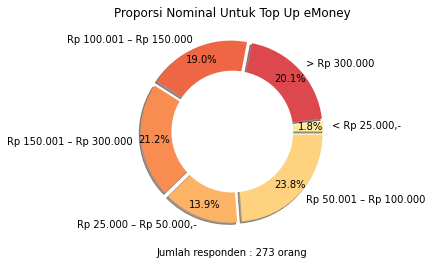

In [36]:
#Mengelompokkan data berdasarkan kolom "39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?"
df21 = df.groupby("39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?").count()

#colors
palette21 = ['#feeb9d', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f']

#explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
  
#plotting pie Chart
fig, ax = plt.subplots()
plt.pie(df21['Jenis Kelamin'], colors=palette21, labels = df21.index,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, shadow = True)
plt.title("Proporsi Nominal Untuk Top Up eMoney")
plt.xlabel(f"Jumlah responden : {df21.Usia.sum()} orang")
  
#Membuat lingkaran
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
#Menambahkan lingkaran di pie chart agar terlihat seperti donut chart
fig.gca().add_artist(centre_circle)

plt.show()

## 22. Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up emoney

In [37]:
df21.rename(columns = {'Jenis Kelamin':'Frekuensi'}, inplace = True)

#Membuat column proporsi yaitu frekuensi/jumlah sampel
df22 = pd.DataFrame(df21.Frekuensi)
df22.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
df21 = pd.concat((df21, df22), axis = 1)
df21['Proporsi'] = df21['Proporsi'].apply(lambda x: x/273)  #jumlah sampel yang valid ialah 273
df21[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?,,
"< Rp 25.000,-",5,0.018315
> Rp 300.000,55,0.201465
Rp 100.001 – Rp 150.000,52,0.190476
Rp 150.001 – Rp 300.000,58,0.212454
"Rp 25.000 – Rp 50.000,-",38,0.139194
Rp 50.001 – Rp 100.000,65,0.238095


## 23. Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)

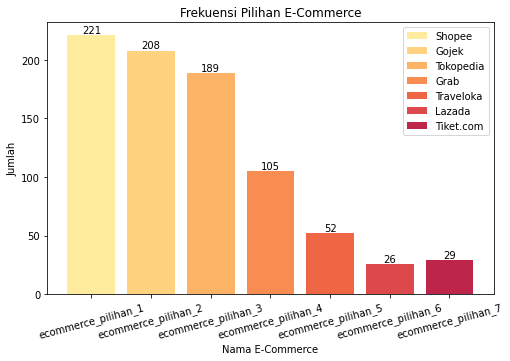

In [38]:
#Membuat dataframe yang berisikan kolom 7 pengguna ecommerce
df23 = df.groupby('Jenis Kelamin').count()
data23 = df23.iloc[:,115:122].sum()

#Plotting barchart
fig,ax = plt.subplots()
bars = plt.bar(data23.index, data23, color = ['#feeb9d', '#fed27f', '#fdb365', '#f88c51', '#ef6645', '#dc484c', '#be254a'])
plt.bar_label(bars)
plt.legend(bars[:], ["Shopee", "Gojek", "Tokopedia", "Grab", "Traveloka", "Lazada", "Tiket.com"])
ax.set(
    xlabel = 'Nama E-Commerce',
    ylabel = 'Jumlah',
    title ='Frekuensi Pilihan E-Commerce'
)
plt.xticks(rotation = 15) 
fig.set(
    figwidth = 8,
    figheight = 5
)
plt.show()

## 24. Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)

In [39]:
#Membuat kolom frekuensi
df24 = pd.DataFrame(data23)
df24.columns = ['Frekuensi']

#Membuat kolom proporsi yaitu frekuensi/jumlah sampel, jumlah sampel valid = 300
copyFrek24 = pd.DataFrame(df24.Frekuensi)
copyFrek24.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
df24 = pd.concat((df24, copyFrek24), axis = 1)
df24['Proporsi'] = df24['Proporsi'].apply(lambda x: x/300)
df24[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
ecommerce_pilihan_1,221,0.736667
ecommerce_pilihan_2,208,0.693333
ecommerce_pilihan_3,189,0.630000
ecommerce_pilihan_4,105,0.350000
ecommerce_pilihan_5,52,0.173333
ecommerce_pilihan_6,26,0.086667
ecommerce_pilihan_7,29,0.096667


## 25. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk responden yang prefer beli handphone secara offline vs online

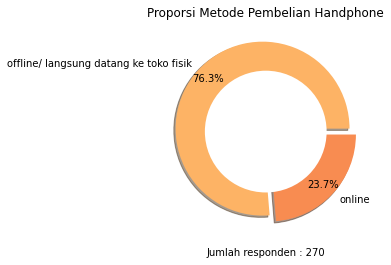

In [40]:
#Mengeloompokkan data berdasarkan kolom preferensi membeli handphone offline/online
df25 = df.groupby("47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]").count()

#colors
palette21 = ['#fdb365', '#f88c51']

#explosion
explode = (0.05, 0.05)
  
#Plotting piechart
fig, ax = plt.subplots()
plt.pie(df25['Jenis Kelamin'], colors=palette21, labels = df25.index,
        autopct='%1.1f%%', pctdistance=0.85, shadow = True,
        explode=explode)
plt.title("Proporsi Metode Pembelian Handphone")
plt.xlabel(f"Jumlah responden : {df25.Usia.sum()}")
  
#Membuat lingkaran
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
#Menambahkan lingkaran pada piechart agar menjadi donutchart
fig.gca().add_artist(centre_circle)

plt.show()

## 26. Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara offline vs online

In [41]:
#Membuat kolom frekuensi berdasarkan jenis kelamin karena jenis kelamin dapat merepresentasikan frekuensi
df25.rename(columns = {'Jenis Kelamin':'Frekuensi'}, inplace = True)

#Membuat column proporsi yaitu frekuensi/jumlah sampel
copyFrek25 = pd.DataFrame(df25.Frekuensi)
copyFrek25.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
df25 = pd.concat((df25, copyFrek25), axis = 1)
df25['Proporsi'] = df25['Proporsi'].apply(lambda x: x/(df25.Frekuensi.sum()))
df25[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone],,
offline/ langsung datang ke toko fisik,206,0.762963
online,64,0.237037


## 27. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk tempat beli makanan online yang pilihan responden

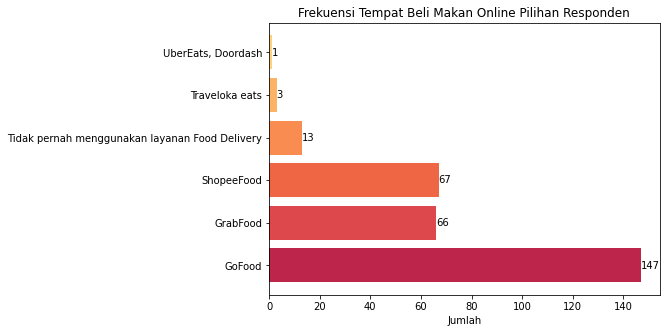

In [42]:
#Mengelompkkan data berdasarkan preferensi aplikasi tempat beli makanan online
temp27 = df.copy()
temp27.rename(columns = {"50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?" : "Aplikasi Pemesan Makanan Online"}, inplace = True)
df27 = temp27.groupby("Aplikasi Pemesan Makanan Online").count()

#Plotting pie chart
fig, ax = plt.subplots()
palette27 =  ['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f']
bars = plt.barh(df27.index, df27['Jenis Kelamin'],
        color = palette27)
plt.bar_label(bars)
fig.set(
    figwidth = 7,
    figheight = 5
)
ax.set(
    xlabel = "Jumlah",
    title = "Frekuensi Tempat Beli Makan Online Pilihan Responden"
)
 
plt.show()

## 28. Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan responden

In [43]:
#Membuat kolom frekuensi berdasarkan jenis kelamin karena jenis kelamin dapat merepresentasikan frekuensi
df27.rename(columns = {'Jenis Kelamin':'Frekuensi'}, inplace = True)

#Membuat column proporsi yaitu frekuensi/jumlah sampel
df28 = pd.DataFrame(df27.Frekuensi)
df28.rename(columns = {'Frekuensi':'Proporsi'}, inplace = True)
df27 = pd.concat((df27, df28), axis = 1)
df27['Proporsi'] = df27['Proporsi'].apply(lambda x: x/(df27.Frekuensi.sum()))
df27[['Frekuensi', 'Proporsi']]

,Frekuensi,Proporsi
Aplikasi Pemesan Makanan Online,,
GoFood,147,0.494949
GrabFood,66,0.222222
ShopeeFood,67,0.225589
Tidak pernah menggunakan layanan Food Delivery,13,0.043771
Traveloka eats,3,0.010101
"UberEats, Doordash",1,0.003367


## 29. Lakukan One Way ANOVA Test berikut:
## $H_0$ : Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur pengguna shopeefood
## $H_1$ : Setidaknya ada dua grup yang memiliki mean umur yang berbeda
## $\alpha  : 5\%$

In [44]:
#Update temp27 (copy dari df) setelah di cleansing agar umur pengguna tidak ada NaN dan tidak ada umur yang tidak valid
temp27.loc[:, ['Usia']] = ageTemp

#Lakukan pengelompokkan
gofood = temp27.loc[temp27['Aplikasi Pemesan Makanan Online'] == 'GoFood'].Usia
grabfood = temp27.loc[temp27['Aplikasi Pemesan Makanan Online'] == 'GrabFood'].Usia
shopeefood = temp27.loc[temp27['Aplikasi Pemesan Makanan Online'] == 'ShopeeFood'].Usia

#Menentukan fhitung dengan One Way ANOVA with Unequal Sample Sizes
f_oneway(gofood, grabfood, shopeefood) #didapatkan f = 10.08, pvalue = 5.9 x 10^-5 , maka
fhitung = 10.08
pvalue = 0.000059

#Dan menggunakan excel, di dapat fcrit (F.INV.RT(0.05,2,277)) = 3.028366

print(f"Karena (fhitung = {fhitung}) berada di (fcrit = 3.028366), maka tolak H0")
print(f"Dan karena (pvalue = {pvalue} < alpha = 0.05), sehingga menguatkan untuk tolak H0 pada tingkat signifikasi {pvalue}")

Karena (fhitung = 10.08) berada di (fcrit = 3.028366), maka tolak H0
Dan karena (pvalue = 5.9e-05 < alpha = 0.05), sehingga menguatkan untuk tolak H0 pada tingkat signifikasi 5.9e-05


## 30. Tuliskan minimal 5 insights/pelajaran dari hasil pengolahan data responden.

In [45]:
print("""
Berdasarkan pengolahan data responden dengan sampel sebanyak 300 orang, didapatkan insights :
1. Responden wanita (157 orang) lebih banyak dibandingkan dengan responden pria (143 orang)
2. Rata-rata responden berumur 30 tahun, dengan responden termuda berusia 10 tahun dan responden tertua berusia 67 tahun
3. Profesi responden terbanyak ialah Pelajar/Mahasiswa sebanyak 146 orang
4. Sebanyak 48.7% dari 300 responden merasa aktivitas onlinenya meningkat dalam 3 bulan terakhir
5. Bank BNI merupakan bank paling populer
6. Mobile Banking merupakan pilihan paling populer untuk melakukan transfer antar bank
7. GoPay merupakan piilihan paling populer untuk penggunaan E-Money
8. Sebagian besar responden yaitu sebanyak 23.8% dari 300 responden memilih Top Up E-Money sebesar Rp 50.001 - Rp 100.000
9. Shopee merupakan E-Commerce paling populer
10. Sebanyak 76.3% dari 300 responden lebih memilih membeli HP secara offline dibandingkan membelinya secara online
11. GoFood merupakan layanan tempat beli makan online paling populer
12. Setelah melakukan One Way ANOVA, didapatkan bahwasanya mean umur pengguna gofood, grabfood, dan shopeefood berbeda
""")


Berdasarkan pengolahan data responden dengan sampel sebanyak 300 orang, didapatkan insights :
1. Responden wanita (157 orang) lebih banyak dibandingkan dengan responden pria (143 orang)
2. Rata-rata responden berumur 30 tahun, dengan responden termuda berusia 10 tahun dan responden tertua berusia 67 tahun
3. Profesi responden terbanyak ialah Pelajar/Mahasiswa sebanyak 146 orang
4. Sebanyak 48.7% dari 300 responden merasa aktivitas onlinenya meningkat dalam 3 bulan terakhir
5. Bank BNI merupakan bank paling populer
6. Mobile Banking merupakan pilihan paling populer untuk melakukan transfer antar bank
7. GoPay merupakan piilihan paling populer untuk penggunaan E-Money
8. Sebagian besar responden yaitu sebanyak 23.8% dari 300 responden memilih Top Up E-Money sebesar Rp 50.001 - Rp 100.000
9. Shopee merupakan E-Commerce paling populer
10. Sebanyak 76.3% dari 300 responden lebih memilih membeli HP secara offline dibandingkan membelinya secara online
11. GoFood merupakan layanan tempat beli